# Step 3: Time-average cycles

This notebook simply time-averages a depth-integrated energy cycle. 

In [1]:
filter_fac = 32  
end_times = [2500, 2600, 2700, 2800, 2900]  # end times of files that are to be time averaged

cycle = 'bleck'  # 'lorenz' or bleck
extended_diags = False

In [2]:
import numpy as np
import xarray as xr
from dask.diagnostics import ProgressBar

In [3]:
run = 'nw2_0.03125deg_N15_baseline_hmix20'
path = '/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/'
st = xr.open_dataset('%s/%s/static.nc' % (path, run), decode_times=False)

In [4]:
scratchpath = '/glade/scratch/noraloose/filtered_data'
nr_days0 = 100

for i, end_time in zip(range(len(end_times)), end_times):
    filename = '%s/%s/%s_cycle_%08d_fac%i' %(scratchpath, run, cycle, end_time-nr_days0+2, filter_fac) 
    print(filename)
    ds_tmp = xr.open_zarr(filename, decode_times=False)

    if i == 0:
        ds = ds_tmp
    else:
        ds = xr.combine_nested([ds, ds_tmp], concat_dim='time', combine_attrs='drop_conflicts') 

/glade/scratch/noraloose/filtered_data/nw2_0.03125deg_N15_baseline_hmix20/bleck_cycle_00002402_fac32
/glade/scratch/noraloose/filtered_data/nw2_0.03125deg_N15_baseline_hmix20/bleck_cycle_00002502_fac32
/glade/scratch/noraloose/filtered_data/nw2_0.03125deg_N15_baseline_hmix20/bleck_cycle_00002602_fac32
/glade/scratch/noraloose/filtered_data/nw2_0.03125deg_N15_baseline_hmix20/bleck_cycle_00002702_fac32
/glade/scratch/noraloose/filtered_data/nw2_0.03125deg_N15_baseline_hmix20/bleck_cycle_00002802_fac32


In [5]:
ds

<xarray.Dataset>
Dimensions:                        (time: 100, yh: 4480, xh: 1920, zl: 15)
Coordinates:
  * time                           (time) float64 2.402e+03 ... 2.898e+03
  * xh                             (xh) float64 0.01562 0.04688 ... 59.95 59.98
  * yh                             (yh) float64 -69.98 -69.95 ... 69.95 69.98
  * zl                             (zl) float64 1.023e+03 ... 1.028e+03
Data variables: (12/24)
    BC_conversion_TWA              (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
    BC_conversion_TWA_alt          (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
    EKE_TWA                        (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
    EKE_bottom_drag_TWA            (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
    EKE_horizontal_viscosity_TWA   (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
    EKE_production_TWA             (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
    ...                             ...
    MPE                            (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
    dEKEdt_TWA                     (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
    dEPEdt                         (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
    dMKEdt_TWA                     (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
    dMPEdt                         (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
    work_eddy_momentum_fluxes_TWA  (time, yh, xh) float64 dask.array<chunksize=(1, 4480, 1920), meta=np.ndarray>
Attributes:
    filter_factor:  32
    filter_shape:   Gaussian

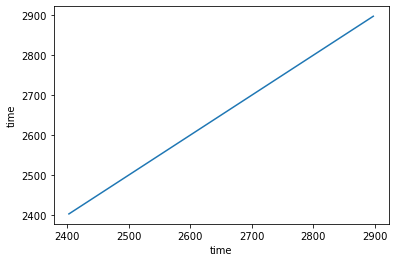

In [6]:
ds.time.plot()

In [7]:
nr_days = 5 * len(ds.time)  # each entry is a 5 day average
nr_days

500

In [8]:
ds_time_averaged = ds.mean(dim='time', keep_attrs=True)
with ProgressBar():
    ds_time_averaged.load()

[########################################] | 100% Completed | 58min 54.8s


In [10]:
ds_time_averaged

<xarray.Dataset>
Dimensions:                        (yh: 4480, xh: 1920, zl: 15)
Coordinates:
  * xh                             (xh) float64 0.01562 0.04688 ... 59.95 59.98
  * yh                             (yh) float64 -69.98 -69.95 ... 69.95 69.98
  * zl                             (zl) float64 1.023e+03 ... 1.028e+03
Data variables: (12/24)
    BC_conversion_TWA              (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    BC_conversion_TWA_alt          (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EKE_TWA                        (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EKE_bottom_drag_TWA            (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EKE_horizontal_viscosity_TWA   (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EKE_production_TWA             (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ...                             ...
    MPE                            (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dEKEdt_TWA                     (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dEPEdt                         (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dMKEdt_TWA                     (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dMPEdt                         (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    work_eddy_momentum_fluxes_TWA  (yh, xh) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    filter_factor:  32
    filter_shape:   Gaussian

In [18]:
workpath = '/glade/work/noraloose/'
filename = '%s/%s/%s_cycle_fac%i_%idays.nc' %(workpath, run, cycle, filter_fac, nr_days) 
filename

'/glade/work/noraloose//nw2_0.03125deg_N15_baseline_hmix20/bleck_cycle_fac32_500days.nc'

In [17]:
with ProgressBar():
    ds_time_averaged.to_netcdf(filename)